In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Workspace for the in-course exercises
***

### Example for Central Limit Theorem (CLT)

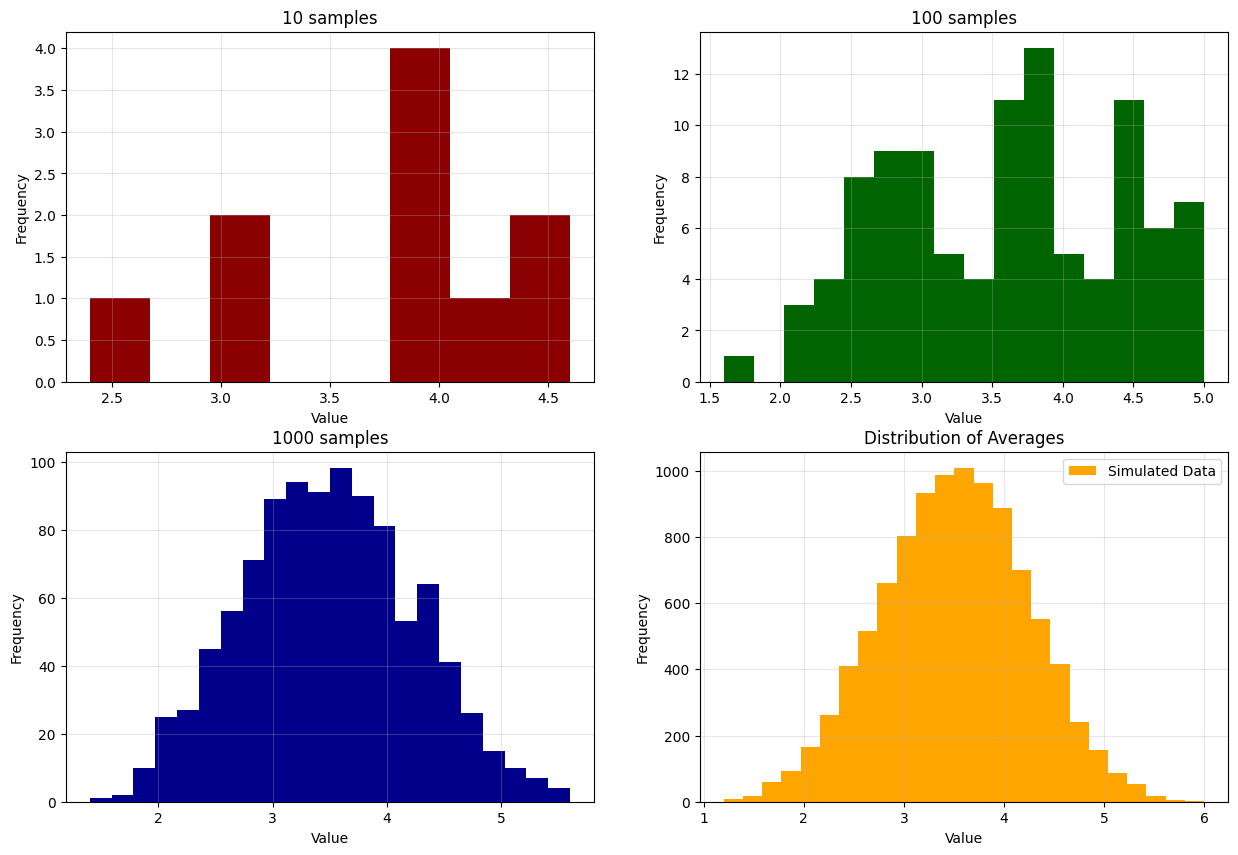

In [13]:
# Your code here
def random_avg(n = 5):
    data = random.choices([1, 2, 3, 4, 5, 6], k = n)
    return np.array(data).mean()

# Generate the data and plot the histogram
colors = ['darkred', 'darkgreen', 'darkblue', 'orange']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for idx, size in enumerate([10, 100, 1000, 10000]):
    data = [random_avg(5) for _ in range(size)]

    # Plot        
    axs[idx//2, idx%2].hist(data, bins=len(np.unique(data)), color=colors[idx], label='Simulated Data')
    axs[idx//2, idx%2].grid(True, alpha=0.3)
    axs[idx//2, idx%2].set_xlabel('Value')
    axs[idx//2, idx%2].set_ylabel('Frequency')
    axs[idx//2, idx%2].set_title(f'{size} samples')

plt.title('Distribution of Averages')
plt.legend()
plt.show()

In [17]:
# Your code here
data = pd.read_csv('/Users/gaspardvilla/src/Nomades_ADA/data/week_2/normal_ci.csv')
data = data.values[:, 0]
sigma = 6
n = len(data)
x_bar = np.mean(data)
cis = []

for alpha in [0.1, 0.05, 0.01]:
    z_alpha = stats.norm.ppf(1 - alpha/2)
    margin_of_error = z_alpha * (sigma / np.sqrt(n))
    ci_lower = x_bar - margin_of_error
    ci_upper = x_bar + margin_of_error
    cis.append((ci_lower, ci_upper))
    print(f"{(1-alpha)*100}% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

90.0% Confidence Interval: [11.876, 12.501]
95.0% Confidence Interval: [11.817, 12.560]
99.0% Confidence Interval: [11.700, 12.677]


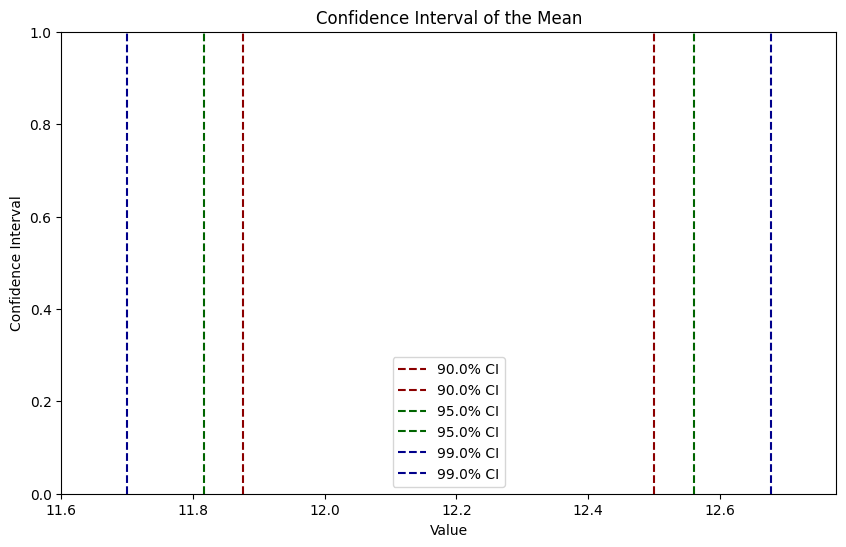

In [22]:
# Plot confidence intervals
plt.figure(figsize=(10, 6))

colors = ['darkred', 'darkgreen', 'darkblue']
for i, alpha in enumerate([0.9, 0.95, 0.99]):
    plt.axvline(cis[i][0], color=colors[i], linestyle='--', label=f'{alpha*100}% CI')
    plt.axvline(cis[i][1], color=colors[i], linestyle='--', label=f'{alpha*100}% CI')
plt.xlabel('Value')
# range x
plt.xlim(11.6, 12.777)
plt.ylabel('Confidence Interval')
plt.title('Confidence Interval of the Mean')
plt.legend()
plt.show()